In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def ondas_explicito(T, m, n, c, f):
    dx = 1/(m-1)
    dt = T/(n-1)
    r = (dt/dx)**2
    
    x = np.linspace(0,1,m)
    t = np.linspace(0,T,n)
    
    U = np.zeros((m,n))
    U[:, 0] = [f(i) for i in x] # u(x,0) = f(x)
    U[:, 1] = U[:, 0] # ut(x,0) = 0
    U[0, :] = 0 # u(0,t) = 0
    U[-1, 1] = U[-2, 1] 
    
    for k in range(1, n-1):
        for i in range(1, m-1):
            U[i, k+1] = (c**2)*r*U[i-1, k] + (2 - 2*(c**2)*r)*U[i, k] + (c**2)*r*U[i+1, k] - U[i, k-1]
        U[-1, k+1] = U[-2, k+1]
    
    return x, t, U

In [26]:
def f(x):
    return np.sin(np.pi*x/2)+2*np.sin(3*np.pi*x/2)

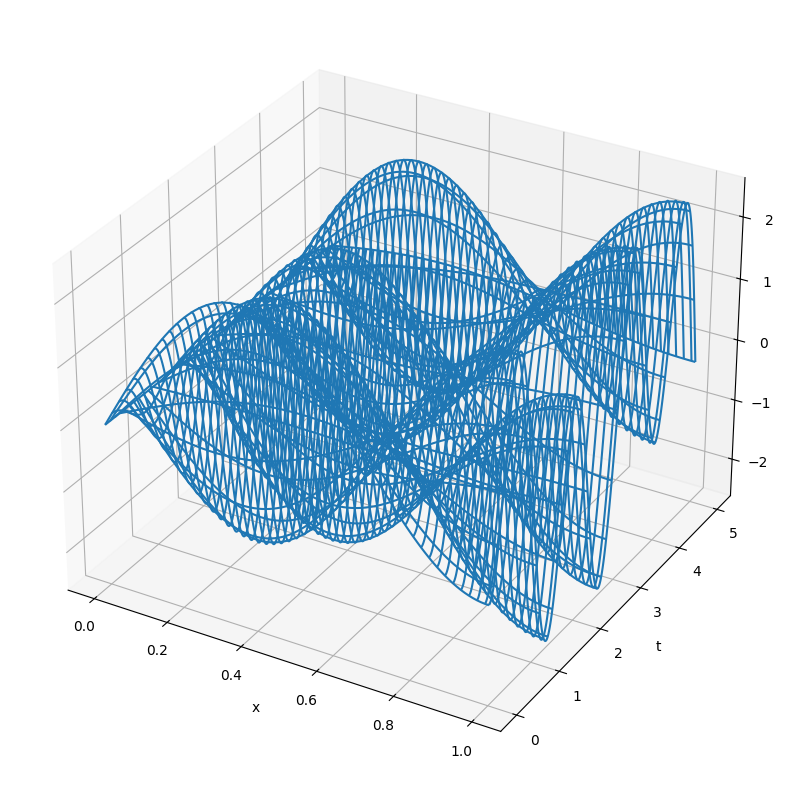

In [27]:
x, t, U = ondas_explicito(5, 100, 10000, 1, f)

T, X = np.meshgrid(t, x)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, T, U)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

In [5]:
def g(x,t):
    return np.sin(np.pi*x/2)*np.cos(np.pi*t/2) + 2*np.sin(3*np.pi*x/2)*np.cos(3*np.pi*t/2)

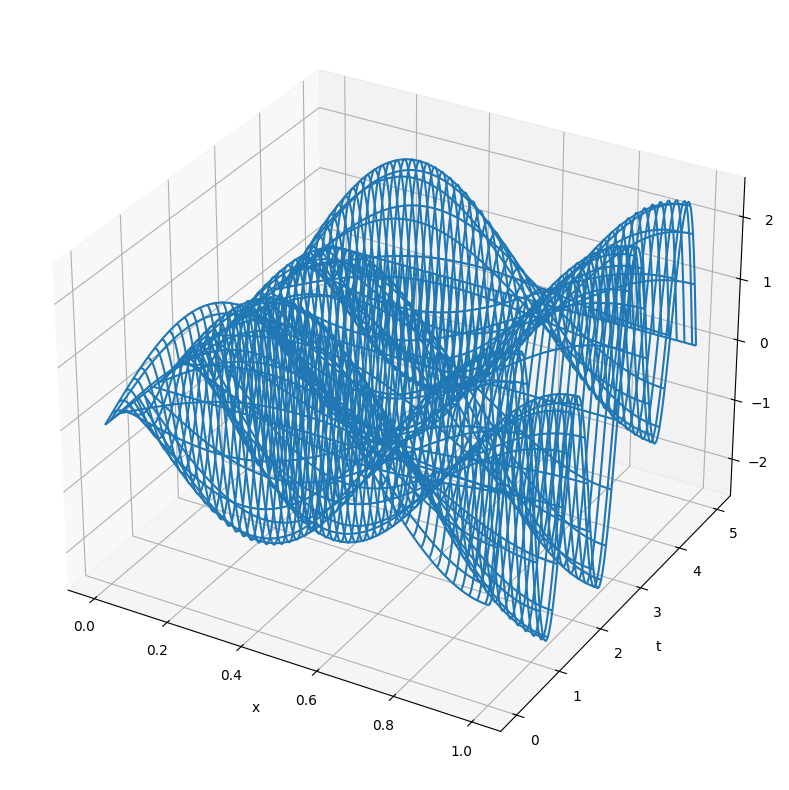

In [6]:
U_real = np.array([np.array([g(x[i], t[j]) for j in range(len(t))]) for i in range(len(x))])

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, T, U_real)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

In [56]:
def ondas_explicito(T, m, n, g, h):
    dx = 10/(m-1)
    dt = T/(n-1)
    r = (dt/dx)**2
    
    x = np.linspace(0,10,m)
    t = np.linspace(0,T,n)
    
    U = np.zeros((m,n))
    U[:, 0] = g(x) # u(x,0) = g(x)
    U[:, 1] = U[:, 0] + dt*h(x)
    U[0, :] = 0
    
    for k in range(1, n-1):
        for i in range(1, m-1):
            U[i, k+1] = r*U[i-1, k] + (2 - 2*r)*U[i, k] + r*U[i+1, k] - U[i, k-1]
    
    return x, t, U

In [57]:
def g(x):
    return np.sin(x)

def h(x):
    return np.cos(x)

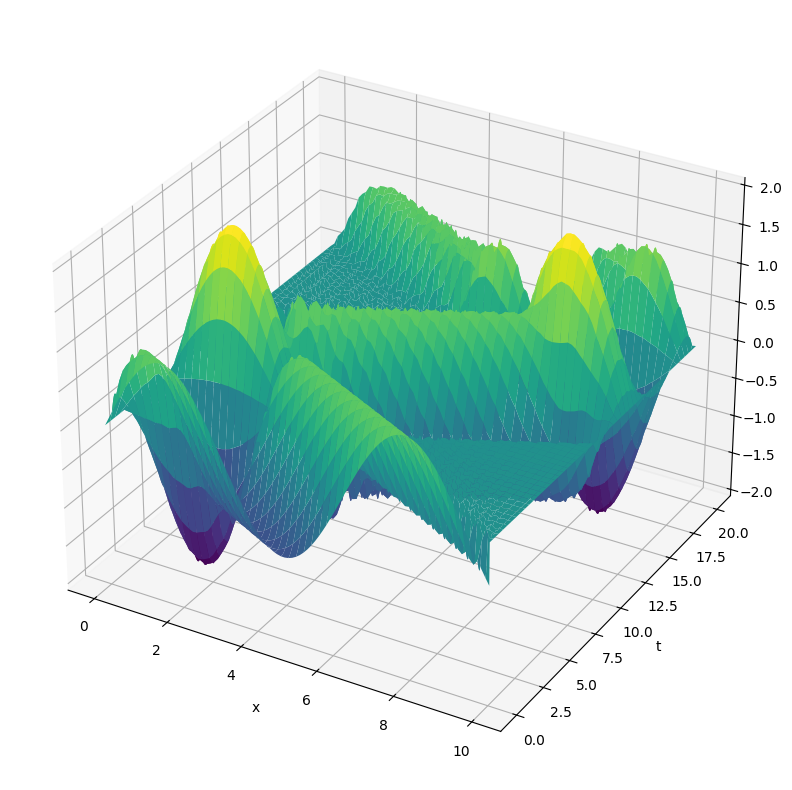

In [60]:
from matplotlib import cm

x, t, U = ondas_explicito(20, 100, 10000, g, h)

T, X = np.meshgrid(t, x)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, T, U, cmap = cm.viridis)
plt.xlabel("x")
plt.ylabel("t")

plt.show()